In [1]:
import csv
import numpy as np
import pandas as pd
import glob
import pickle
from pylab import *

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 100000000)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)

path = ["/home/petr/datainc/2013", "/home/petr/datainc/2014", "/home/petr/datainc/data_2015",
  "/home/petr/datainc/data_Q1_2016", "/home/petr/datainc/data_Q2_2016",
  "/home/petr/datainc/data_Q3_2016", "/home/petr/datainc/data_Q4_2016",
  "/home/petr/datainc/data_Q1_2017", "/home/petr/datainc/data_Q2_2017"]
#path = ["/home/petr/datainc/2013"]
allFiles = []
for path_ in path:
  allFiles += glob.glob(path_ + "/*.csv")

allFiles.sort()
allFiles


['/home/petr/datainc/2013/2013-04-10.csv',
 '/home/petr/datainc/2013/2013-04-11.csv',
 '/home/petr/datainc/2013/2013-04-12.csv',
 '/home/petr/datainc/2013/2013-04-13.csv',
 '/home/petr/datainc/2013/2013-04-14.csv',
 '/home/petr/datainc/2013/2013-04-15.csv',
 '/home/petr/datainc/2013/2013-04-16.csv',
 '/home/petr/datainc/2013/2013-04-17.csv',
 '/home/petr/datainc/2013/2013-04-18.csv',
 '/home/petr/datainc/2013/2013-04-19.csv',
 '/home/petr/datainc/2013/2013-04-20.csv',
 '/home/petr/datainc/2013/2013-04-21.csv',
 '/home/petr/datainc/2013/2013-04-22.csv',
 '/home/petr/datainc/2013/2013-04-23.csv',
 '/home/petr/datainc/2013/2013-04-24.csv',
 '/home/petr/datainc/2013/2013-04-25.csv',
 '/home/petr/datainc/2013/2013-04-26.csv',
 '/home/petr/datainc/2013/2013-04-27.csv',
 '/home/petr/datainc/2013/2013-04-28.csv',
 '/home/petr/datainc/2013/2013-04-29.csv',
 '/home/petr/datainc/2013/2013-04-30.csv',
 '/home/petr/datainc/2013/2013-05-01.csv',
 '/home/petr/datainc/2013/2013-05-02.csv',
 '/home/pet

In [22]:
models_hist = {}

#count = 0
for file_ in allFiles:
  df = pd.read_csv(file_, index_col=None, header=0, usecols=['model','failure','smart_9_raw'])
  df = df[df["failure"]==1]
  if (len(df) > 0):
    for m, h in zip(df['model'], df['smart_9_raw']):
      if not m in models_hist:
        models_hist[m] = [h]
      else:
        models_hist[m] += [h]

print models_hist

pickle_out = open("model_hist.pickle","wb")
pickle.dump(models_hist, pickle_out)
pickle_out.close()


{'ST3500320AS': [43219], 'ST4000DM001': [431, 502, 501, 527, 571], 'ST4000DM000': [491, 491, 324, 468, 469, 463, 468, 419, 437, 617, 212, 220, 252, 654, 730, 305, 1076, 403, 1148, 1619, 1833, 1858, 1907, 1387, 757, 840, 886, 123, 1886, 3493, 339, 2467, 775, 2585, 1924, 729, 2729, 2696, 3444, 1715, 3566, 2345, 3730, 1271, 1091, 2446, 4539, 1683, 941, 1781, 3446, 3258, 5985, 2916, 2933, 2933, 2616, 93, 740, 2113, 2067, 3129, 3566, 5102, 548, 465, 1257, 608, 522, 1104, 232, 4043, 3919, 756, 1284, 1109, 849, 1193, 4750, 1119, 4750, 3784, 1421, 5313, 5313, 200, 200, 226, 4667, 4667, 4845, 509, 3123, 2951, 557, 249, 104, 104, 3394.0, nan, 272, 622, 3681, 1052, 1053, 5189, 5189, 5411, 5412, 729, 5936, 5936, 4906, 871, 3525, 479, 950, 1398, 6440, 679, 1565, 4255, 5892, 5892, 4256, 1342, 2695, 7567, 7567, 7567, 1471, 1848, 4678, 2188, 2911, 2911, 2018, 1783, 5934, 1664, 5421, 5117, 1847, 9473, 1180, 9472, 1526, 1657, 1656, 1526, 4297, 3147, 9763, 9926, 1805, 6306, 2622, 3311, 3334, 6435, 6485, 

In [20]:
pickle_in = open("model_hist.pickle","rb")
models_hist = pickle.load(pickle_in)

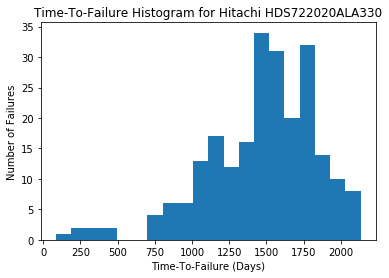

In [21]:
model = 'Hitachi HDS722020ALA330'
plt.xlabel("Time-To-Failure (Days)")
plt.ylabel("Number of Failures")
plt.title("Time-To-Failure Histogram for " + model)
plt.hist([x/24 for x in models_hist[model]], bins=20)
plt.show()